In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from common import get_data_path
from tables_utils import Columns, group_by_type

# Import data

In [4]:
data_path = get_data_path('2016_04_16_10k_extended.h5')
table_name = 'DownstreamDebugTuple'
hdf = pd.HDFStore(data_path)
df = hdf.select(table_name)
hdf.close()
columns = Columns(data_path, table_name)

In [5]:
df.head()

,is_true_track,stored_track_charge,stored_track_chi2PerDoF,stored_track_p,stored_track_pt,track_chi2,track_displX,track_displY,track_errXMag,track_errYMag,...,OT3U,OT3V,OT3X1,OT3X2,TTaU,TTaX,TTbV,TTbX,TT_hits,seed_hits
0,False,-1.0,0.0,2813.418882,224.920986,4.813538,-22.356223,89.733734,16.057639,34.542863,...,2,2,2,2,1,1,1,1,4,12
1,True,1.0,0.0,2860.774829,104.954152,0.641020,10.119161,-5.022615,14.293209,29.129699,...,2,2,2,2,1,1,1,1,4,12
2,True,-1.0,0.0,4708.773697,598.412044,0.444495,4.222189,0.077200,8.363078,13.041752,...,2,2,2,2,1,1,1,1,4,12
3,False,-1.0,0.0,2272.888309,110.372386,1.878962,-5.948619,49.530041,19.860208,46.868273,...,2,2,2,2,1,1,1,1,4,12
4,True,1.0,0.0,3066.207537,425.192025,0.556747,13.956091,-1.886976,13.388854,26.446259,...,2,1,2,2,1,1,1,1,4,12


In [6]:
group_by_type(df)
df.loc[df['seed_class'] == 1, 'seed_class'] = 'IT'
df.loc[df['seed_class'] == 2, 'seed_class'] = 'OT'
df.loc[df['seed_class'] == 3, 'seed_class'] = 'IT/OT'

In [7]:
df.head()

,is_true_track,stored_track_charge,stored_track_chi2PerDoF,stored_track_p,stored_track_pt,track_chi2,track_displX,track_displY,track_errXMag,track_errYMag,...,OT3V,OT3X1,OT3X2,TTaU,TTaX,TTbV,TTbX,TT_hits,seed_hits,type
0,False,-1.0,0.0,2813.418882,224.920986,4.813538,-22.356223,89.733734,16.057639,34.542863,...,2,2,2,1,1,1,1,4,12,GT/TS
1,True,1.0,0.0,2860.774829,104.954152,0.641020,10.119161,-5.022615,14.293209,29.129699,...,2,2,2,1,1,1,1,4,12,TT/TS
2,True,-1.0,0.0,4708.773697,598.412044,0.444495,4.222189,0.077200,8.363078,13.041752,...,2,2,2,1,1,1,1,4,12,TT/TS
3,False,-1.0,0.0,2272.888309,110.372386,1.878962,-5.948619,49.530041,19.860208,46.868273,...,2,2,2,1,1,1,1,4,12,GT/TS
4,True,1.0,0.0,3066.207537,425.192025,0.556747,13.956091,-1.886976,13.388854,26.446259,...,1,2,2,1,1,1,1,4,12,TT/TS


<IPython.core.display.Javascript object>


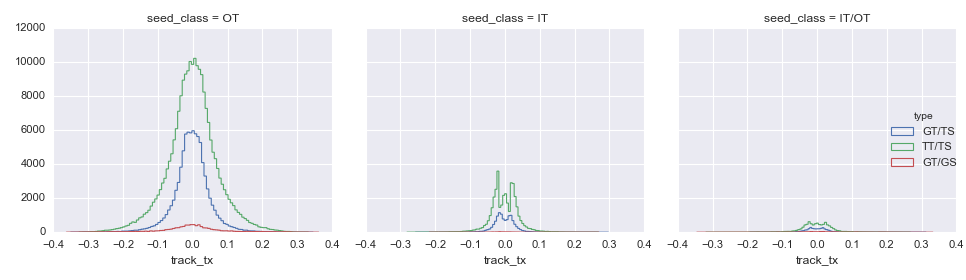

In [8]:
g = sns.FacetGrid(df, col='seed_class', hue='type', size=3.5, aspect=1.15)
g.map(plt.hist, 'track_tx', bins=100, histtype='step', linewidth=1, normed=False)
g.add_legend()

<IPython.core.display.Javascript object>


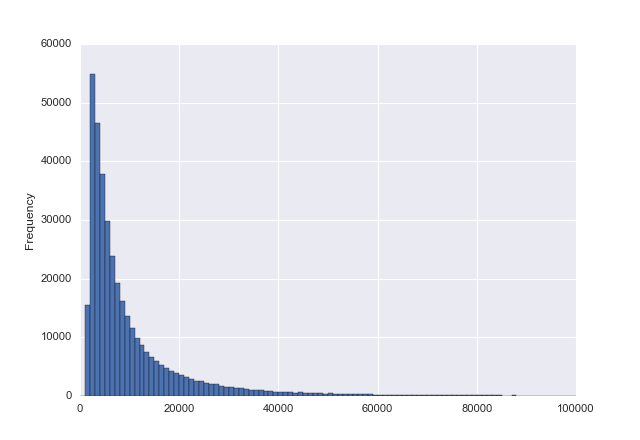

In [9]:
plt.figure()
df['seed_p'].plot.hist(bins=100, range=(0, 100000))

In [10]:
with pd.option_context('display.float_format', lambda x: str(int(x))):
    print(df.groupby('seed_PID').size())

seed_PID
-3312              2
-3112              4
-2212           8634
-321           15408
-211          118306
-13             4080
-11            31205
0               9955
11             29300
13              3776
211           124070
321            17232
2212           14426
3112               3
3222               2
3312               2
1000010020         1
dtype: int64


<IPython.core.display.Javascript object>


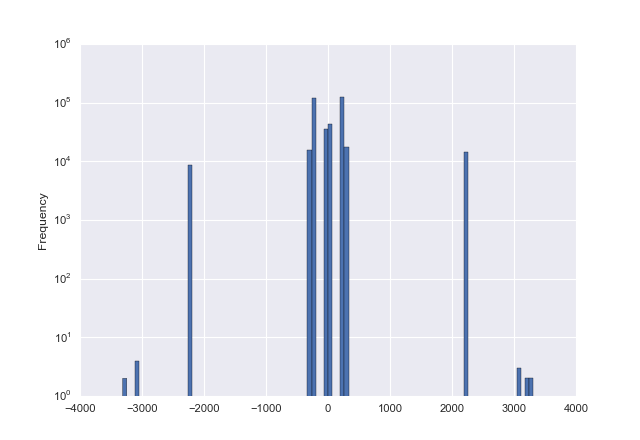

In [11]:
plt.figure()
df[df['seed_PID'] != 1000010020]['seed_PID'].plot.hist(bins=100, log=True)